## Master thesis: Nissan Sales Forecasting in Finland using Machine Learning

### Install Required Libraries:

* Lib 1 
* Lib 2

In [61]:
# Install statsmodels
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
##########################
# Import libraries
##########################

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import glob
import time

import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = [16, 9]

##########################
# Define global variables
##########################

# Input filename, path to source files and output filename
input_files = "Retails_CY*.xls*"
path = 'D:/Git_Projects/5. Master_thesis/Data/'
filename = path + 'Retails_ALL_CY11_CY22.xlsx'

### Loading data:

#### 1. Merging files into one single Excel file

* This step is only required once

In [2]:
# List excel files in the path
file_list = glob.glob(path + input_files)

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the 
# excel data into pandas dataframe.
excl_list = []

print("Reading files....\n") 
start_time = time.time()

for file in file_list:
    print(file)
    excl_list.append(pd.read_excel(file))
 
# concatenate all DataFrames in the list
# into a single DataFrame, returns new
# DataFrame.
excl_merged = pd.concat(excl_list, ignore_index=True)
 
# exports the dataframe into excel file
# with specified name.
print('\nMerging %d files....\n' % len(file_list)) 
excl_merged.to_excel(filename, index=False)

end_time = time.time()
time_elapsed = end_time - start_time 
print('Completed in %f seconds.' % time_elapsed)

Reading files....

D:/Git_Projects/5. Master_thesis/Data\Retails_CY11.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY12.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY13.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY14.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY15.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY16.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY17.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY18.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY19.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY20.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY21.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY22.xlsx

Merging 12 files....

Completed in 350.210272 seconds.


#### 2. Reading Exce File and loading content into Pandas dataframe

In [6]:
# Load dataset into a pandas dataframe
df = pd.concat(pd.read_excel(filename, sheet_name=None), ignore_index=True)

In [7]:
# Preview dataframe
df

,vehOrderClassCode,RetailNSC,NSCModelGroupCode,ReportingModelGroup,orderNumber,FleetCode,DealerCodeRetail,orderCreatedDate,RetailCountry,RetailDate,...,FinancialOwnerCategoryCurrent,FinancialOwnerCategoryNext,RetailCount,VINCode,CustomerName,Month,ModelDescription,Quarter,TRIM,YEAR
0,U,37,F15,F15F,NNE0150004,NaN,130520,2010-06-17 09:38:00,DEN,02/01/2011 09:13:58,...,4,5,1,SJNFBAF15U6037010,NaN,Jan,NaN,NaN,NaN,NaN
1,B,37,D40,D40D,NNE0144170,011070,150110,2010-05-19 08:01:00,SWE,02/01/2011 15:12:15,...,4,5,1,VSKCAND40U0400996,GEA VVS,Jan,NaN,NaN,NaN,NaN
2,L,37,F15,F15F,NNE0161192,000194,160040,2010-10-15 14:44:00,FIN,03/01/2011 06:25:49,...,4,5,1,SJNFBAF15U6017454,Axus Finland/Via Tra,Jan,NaN,NaN,NaN,NaN
3,L,37,J10F,J10G,NNE0146363,000964,160040,2010-06-03 05:55:00,FIN,03/01/2011 06:28:35,...,4,5,1,SJNJAAJ10U7038560,Nordea Rahoitus/Icar,Jan,NaN,NaN,NaN,NaN
4,P,37,J10,J10B,NNE0147851,NaN,160230,2010-06-08 13:04:00,FIN,03/01/2011 06:30:20,...,4,5,1,SJNFAAJ10U2197900,KEMPPAINEN MATTI,Jan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465355,D,37,ZE1,ZE1A,NNE0646910,,151090,2022-03-02 07:49:21,SWE,01/08/2022 06:35:16,...,4,5,1,SJNFAAZE1U0165641,DEMO NORRKÄPING,August,NaN,Q2,NaN,2022.0
465356,P,37,ZE1,ZE1A,NNE0646922,,140240,2022-03-02 09:24:37,NOR,29/08/2022 08:58:14,...,4,5,1,SJNFAAZE1U0167182,Mikalsen,August,NaN,Q2,NaN,2022.0
465357,P,37,ZE1,ZE1A,NNE0646927,,140380,2022-03-02 09:47:36,NOR,15/08/2022 14:35:03,...,4,5,1,SJNFAAZE1U0166106,Eskilt,August,NaN,Q2,NaN,2022.0
465358,L,37,ZE1,ZE1A,NNE0647072,021717,151010,2022-03-04 10:09:25,SWE,10/08/2022 08:28:45,...,4,5,1,SJNFAAZE1U0165614,Carina Flygholm,August,NaN,Q2,NaN,2022.0


In [8]:
# Preview dataframe columns
df.columns

Index(['vehOrderClassCode', 'RetailNSC', 'NSCModelGroupCode',
       'ReportingModelGroup', 'orderNumber', 'FleetCode', 'DealerCodeRetail',
       'orderCreatedDate', 'RetailCountry', 'RetailDate', 'ModelGroup',
       'EndItem', 'EIColourCode', 'DealerDeliveryAddrNoRetail',
       'FinancialOwnerCategoryCurrent', 'FinancialOwnerCategoryNext',
       'RetailCount', 'VINCode', 'CustomerName', 'Month', 'ModelDescription',
       'Quarter', 'TRIM', 'YEAR'],
      dtype='object')

In [10]:
# Create a copy
df_Finland = df

In [11]:
pd.set_option('mode.chained_assignment', None)

# Get only Finland orders
df_Finland = df_Finland[df_Finland.RetailCountry == 'FIN']

# Remove duplicates
df_Finland.drop_duplicates(subset=['orderNumber'], keep='last', inplace=True)

# Remove unnecessary columns
df_Finland.drop(['vehOrderClassCode', 'RetailNSC', 'NSCModelGroupCode',
       'ReportingModelGroup', 'FleetCode', 'DealerCodeRetail',
       'orderCreatedDate', 'RetailCountry', 'ModelGroup',
       'EndItem', 'EIColourCode', 'DealerDeliveryAddrNoRetail',
       'FinancialOwnerCategoryCurrent', 'FinancialOwnerCategoryNext',
       'RetailCount', 'VINCode', 'CustomerName', 'Month', 'ModelDescription',
       'Quarter', 'TRIM', 'YEAR'], axis=1, inplace=True)

# Convert datetime column to just date
df_Finland['RetailDate'] = pd.to_datetime(df_Finland['RetailDate'], dayfirst=True).dt.date
df_Finland['year'] = pd.DatetimeIndex(df_Finland['RetailDate']).year
df_Finland['month'] = pd.DatetimeIndex(df_Finland['RetailDate']).month

In [13]:
df_Finland
df_Finland.to_excel("output.xlsx")  

In [14]:
# Using groupby() and count()
result = df_Finland.groupby(['year', 'month']).size().reset_index(name='Orders')
result['Date'] = pd.to_datetime(result[['year', 'month']].assign(DAY=1))
result.drop(['year', 'month'], axis=1, inplace=True)
result = result.set_index("Date")

In [15]:
result

,Orders
Date,
2011-01-01,900
2011-02-01,672
2011-03-01,916
2011-04-01,786
2011-05-01,763
...,...
2022-04-01,320
2022-05-01,224
2022-06-01,233


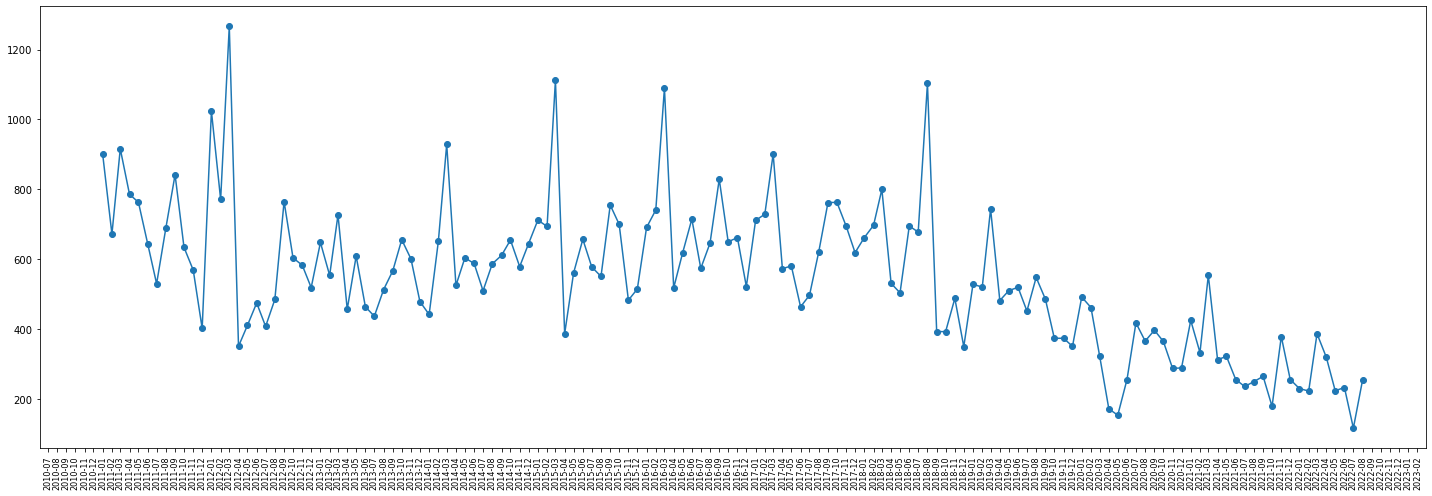

In [18]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format.
fig, axes = plt.subplots(figsize=(20,7))

plt.plot(result['Orders'], label = 'Orders', marker = 'o')

axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)

# Autolayout
plt.rcParams["figure.autolayout"] = True

# Set the font size of xticks
plt.xticks(fontsize=8)
plt.xticks(rotation = 'vertical')
plt.show()

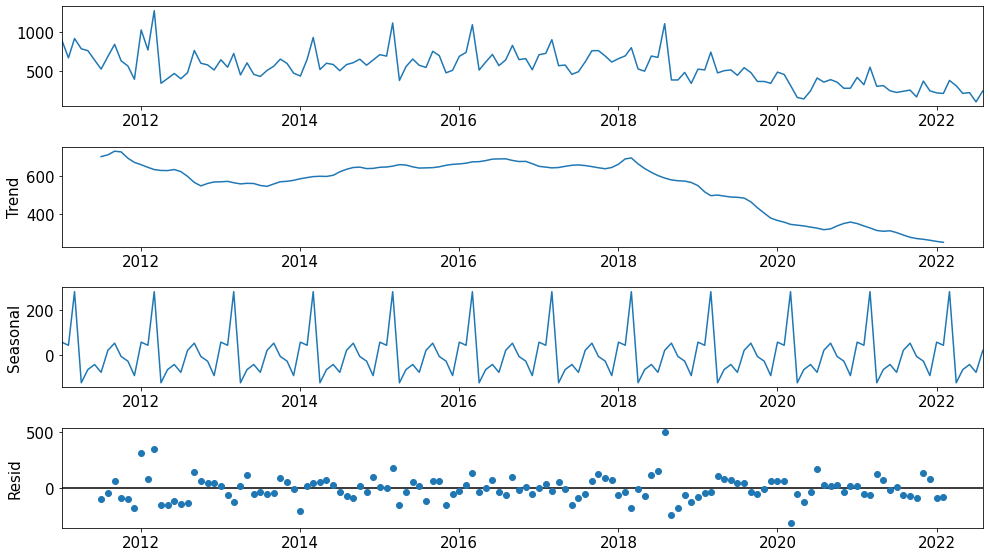

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

output = seasonal_decompose(result,model='additive')
fig = output.plot()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


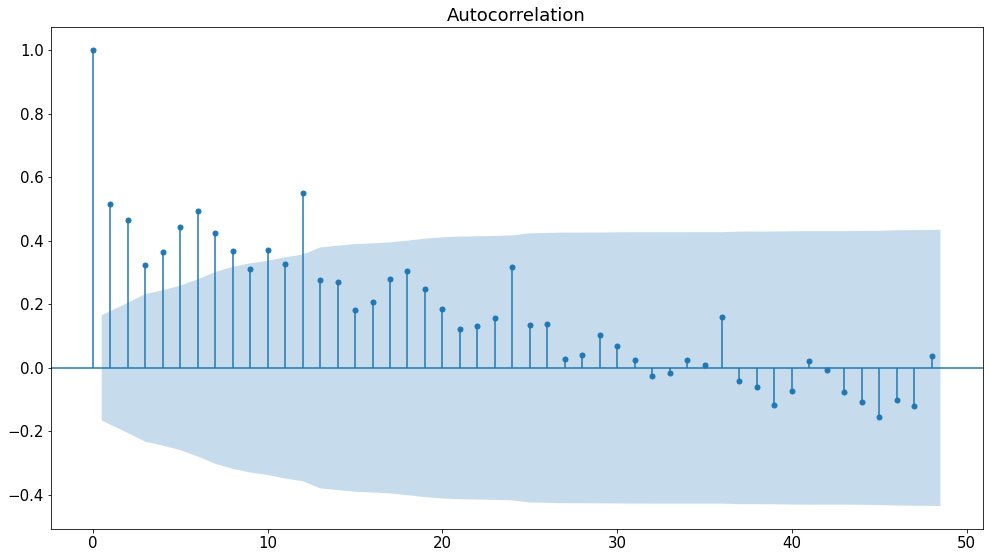

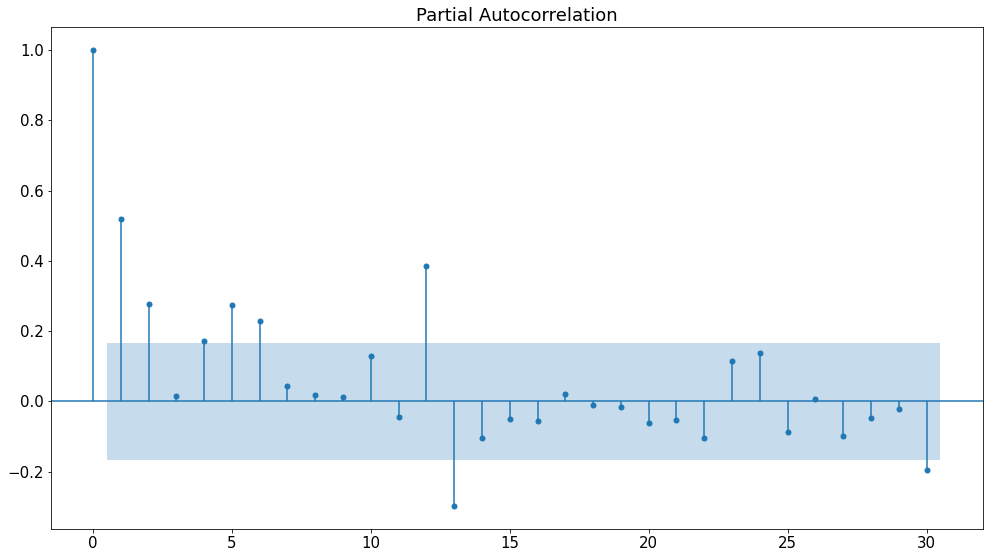

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(result['Orders'], lags=48);
plot_pacf(result['Orders'], lags=30);

In [21]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(result['Orders'], order=(12,1,1))
predictions = arima.fit().predict()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'